In [89]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To display plots inside the notebook
%matplotlib inline


In [91]:
# Load CSV file
df = pd.read_csv('customer_shopping_behavior.csv')

In [93]:
# View first 5 rows
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [95]:
# Number of rows and columns
df.shape

(3900, 18)

In [97]:
# Column names
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [101]:
# Data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [103]:
# Numeric Column
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3863.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.750065,25.351538
std,1125.977353,15.207589,23.685392,0.716983,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.800000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [105]:
# Categorical Columns
df.describe(include='object')


,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


In [107]:
# Missing Values
df.isnull().sum()



Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

In [109]:
# Fill Missing Review Ratings Using Median by Category
df['Review Rating'] = df.groupby('Category')['Review Rating']\
                        .transform(lambda x: x.fillna(x.median()))

# This keeps ratings realistic based on category.

In [111]:
# Duplicate Check
df.duplicated().sum()


0

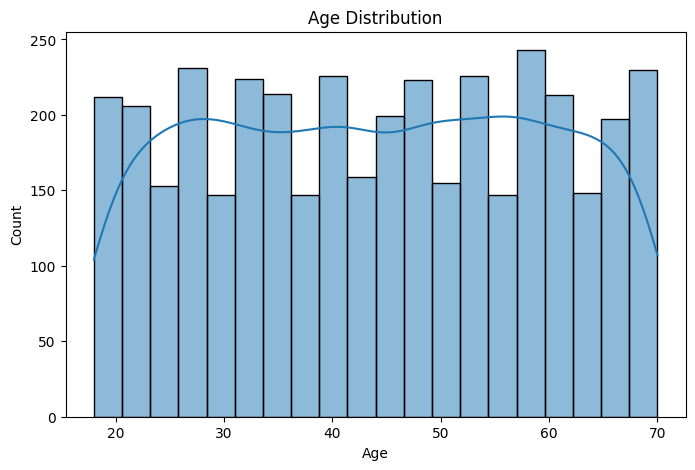

In [113]:
# Univariate Analysis
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()


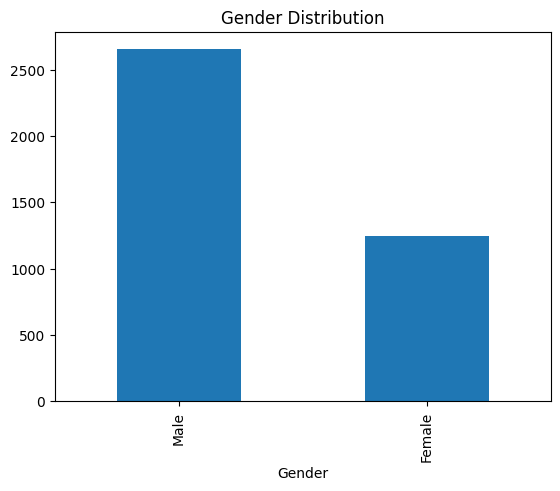

In [27]:
# Gender Distribution
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.show()


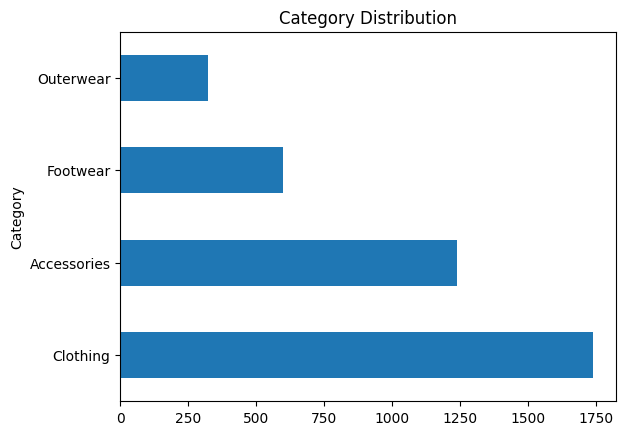

In [115]:
# Category Distribution
df['Category'].value_counts().plot(kind='barh')
plt.title('Category Distribution')
plt.show()


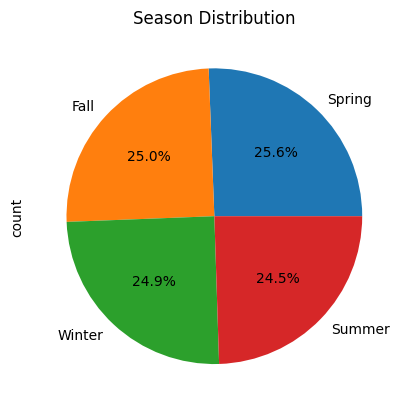

In [117]:
# Season Distribution
df['Season'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Season Distribution')
plt.show()


In [ ]:
# Bivariate Analysis

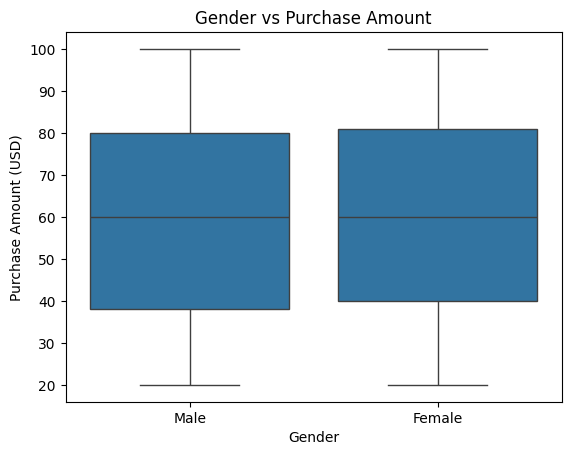

In [33]:
# Gender vs Purchase Amoun
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df)
plt.title('Gender vs Purchase Amount')
plt.show()


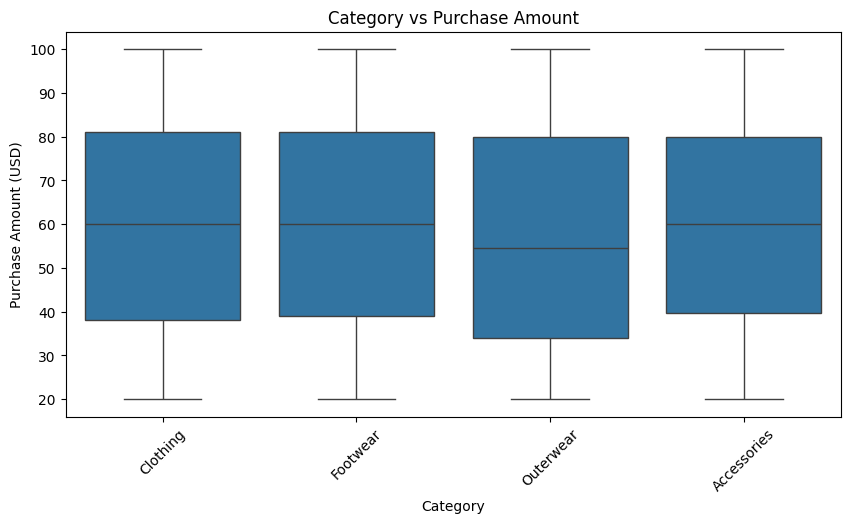

In [119]:
# Category vs Purchase Amount
plt.figure(figsize=(10,5))
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df)
plt.xticks(rotation=45)
plt.title('Category vs Purchase Amount')
plt.show()


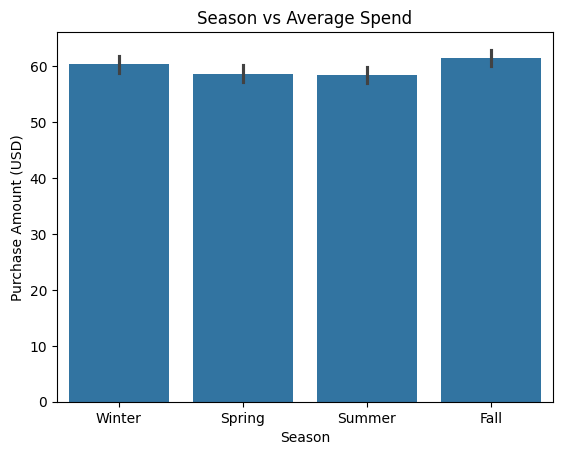

In [121]:
# Season vs Purchase Amount
sns.barplot(x='Season', y='Purchase Amount (USD)', data=df)
plt.title('Season vs Average Spend')
plt.show()


In [ ]:
# Customer Behavior Analysis

In [125]:
# Subscription Impact
df.groupby('Subscription Status')['Purchase Amount (USD)'].mean()


Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64

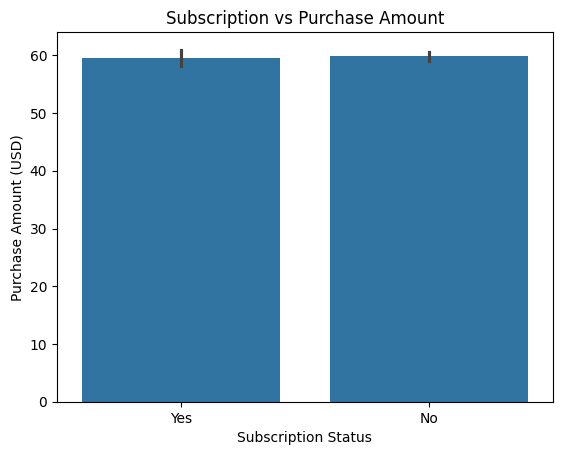

In [127]:
sns.barplot(x='Subscription Status', y='Purchase Amount (USD)', data=df)
plt.title('Subscription vs Purchase Amount')
plt.show()


In [ ]:
# Discount Impact

In [129]:
df.groupby('Discount Applied')['Purchase Amount (USD)'].mean()


Discount Applied
No     60.130454
Yes    59.279070
Name: Purchase Amount (USD), dtype: float64

In [ ]:
# Promo Code Impact

In [131]:
df.groupby('Promo Code Used')['Purchase Amount (USD)'].mean()


Promo Code Used
No     60.130454
Yes    59.279070
Name: Purchase Amount (USD), dtype: float64

In [ ]:
# Repeat Customers

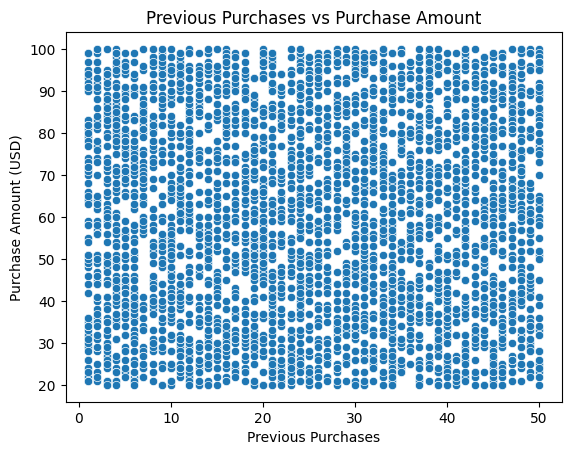

In [133]:
sns.scatterplot(x='Previous Purchases', y='Purchase Amount (USD)', data=df)
plt.title('Previous Purchases vs Purchase Amount')
plt.show()


In [ ]:
# Ratings Analysis

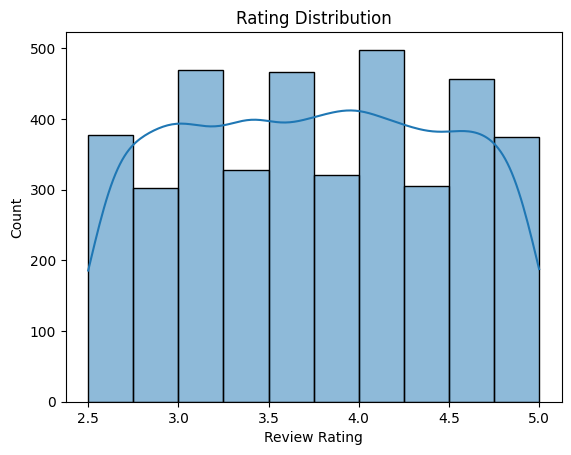

In [135]:
# Rating Distribution
sns.histplot(df['Review Rating'], bins=10, kde=True)
plt.title('Rating Distribution')
plt.show()


In [ ]:
# Rating by Category

In [137]:
df.groupby('Category')['Review Rating'].mean().sort_values(ascending=False)


Category
Footwear       3.793823
Accessories    3.770242
Outerwear      3.745988
Clothing       3.721301
Name: Review Rating, dtype: float64

In [ ]:
# Rating vs Purchase Amount

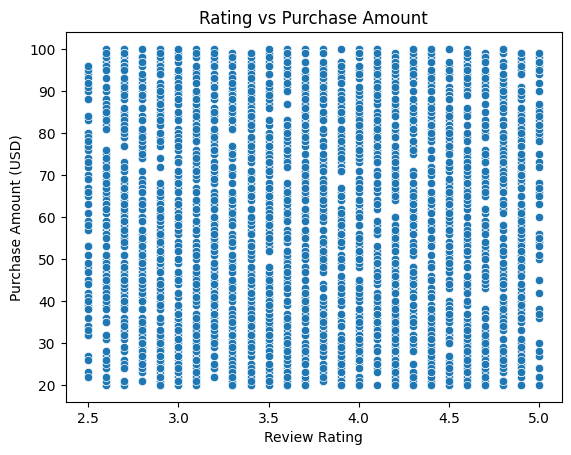

In [139]:
sns.scatterplot(x='Review Rating', y='Purchase Amount (USD)', data=df)
plt.title('Rating vs Purchase Amount')
plt.show()


In [ ]:
# Payment & Shipping Analysis

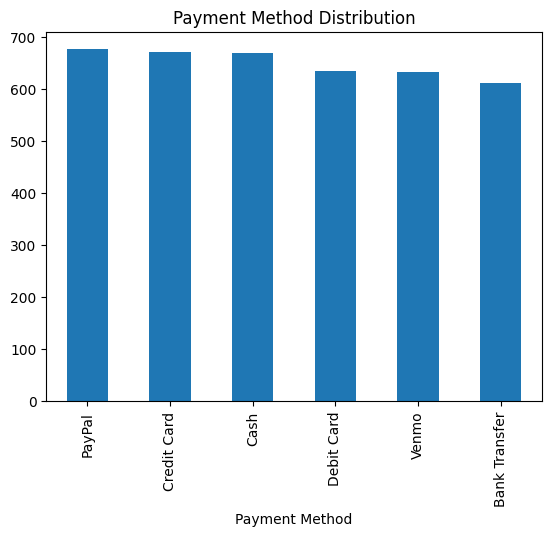

In [141]:
# Payment Method Distribution 
df['Payment Method'].value_counts().plot(kind='bar')
plt.title('Payment Method Distribution')
plt.show()


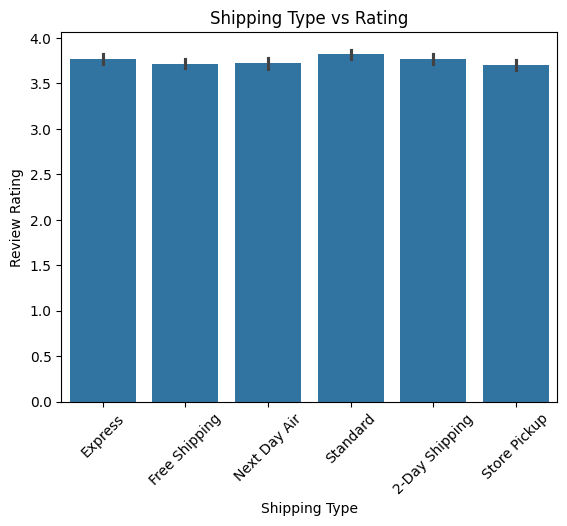

In [57]:
# Shipping Type vs Rating
sns.barplot(x='Shipping Type', y='Review Rating', data=df)
plt.xticks(rotation=45)
plt.title('Shipping Type vs Rating')
plt.show()


In [ ]:
# Correlation Analysis

In [143]:
# Encode Categorical Columns
df_encoded = df.copy()

for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes


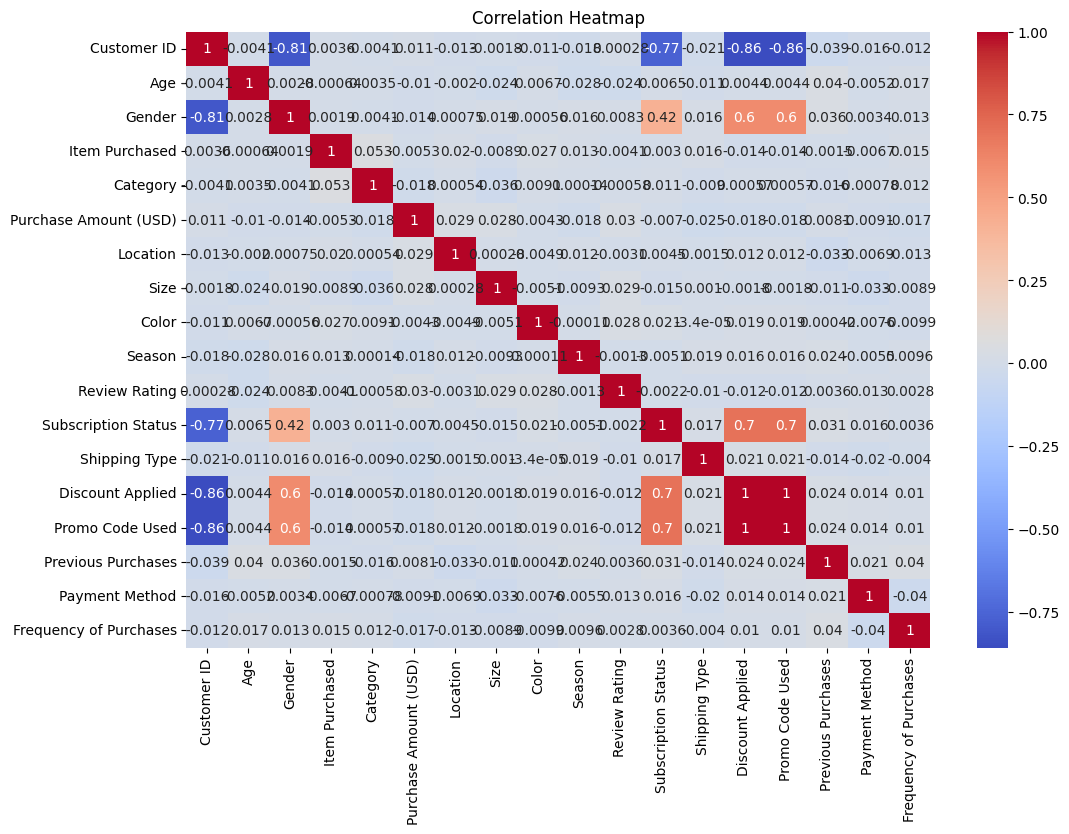

In [145]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Feature Engineering

In [147]:
# Create Age Groups
bins = [0, 18, 25, 35, 45, 55, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '55+']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)


In [149]:
# Convert Frequency into Numeric
freq_map = {
    'Daily': 365,
    'Weekly': 52,
    'Fortnightly': 26,
    'Monthly': 12,
    'Quarterly': 4,
    'Annually': 1
}

df['Purchase Frequency (Days)'] = df['Frequency of Purchases'].map(freq_map)


In [151]:
total_revenue = df['Purchase Amount (USD)'].sum()

In [153]:
avg_order_value = df['Purchase Amount (USD)'].mean()

In [155]:
avg_rating = df['Review Rating'].mean()

In [157]:
total_customers = df['Customer ID'].nunique()

In [159]:
total_revenue, avg_order_value, avg_rating, total_customers

(233081, 59.76435897435898, 3.750051282051282, 3900)

In [161]:
# Renaming columns according to snake casing for better readability and documentation

df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')


In [163]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases', 'age_group',
       'purchase_frequency_(days)'],
      dtype='object')

In [165]:
df=df.rename(columns={'purchase_amount_(usd)':'purchase_amount'})

In [167]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases', 'age_group',
       'purchase_frequency_(days)'],
      dtype='object')

In [169]:
df.to_csv("cleaned_customer_data.csv", index=False)

In [171]:
from sqlalchemy import create_engine
from urllib.parse import quote_plus

username = "postgres"
password = "Ricky@143525"
encoded_password = quote_plus(password)  # IMPORTANT
host = "localhost"
port = "5432"
database = "Rickydb"

engine = create_engine(
    f"postgresql+psycopg2://{username}:{encoded_password}@{host}:{port}/{database}"
)

# Load DataFrame into PostgreSQL
table_name = "customer"
df.to_sql(table_name, engine, if_exists="replace", index=False)

print(f"Data Successfully loaded into table '{table_name}' in database '{database}'.")

Data Successfully loaded into table 'customer' in database 'Rickydb'.
